In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import  StandardScaler,RobustScaler
from sklearn.impute import  SimpleImputer
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score

In [3]:
dataset = pd.read_csv('/config/workspace/Cement_Strength_Prediction/notebooks/data/cement_data_preprocessed.csv')
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# Split dataset into Dependent and Independent Features
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [5]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [62]:
# Split dataset into train-test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.19,random_state=42)

In [63]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
753,339.0,0.0,0.0,185.0,0.0,1069.0,754.0,28
594,254.0,0.0,0.0,198.0,0.0,968.0,863.0,90
557,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7
363,520.0,0.0,0.0,175.0,5.2,870.0,805.0,28
523,333.0,0.0,0.0,192.0,0.0,931.2,842.6,7


In [64]:
X_test.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
926,152.7,144.7,0.0,178.1,8.0,999.7,822.2,28
630,122.6,183.9,0.0,203.5,0.0,958.2,800.1,28
682,153.0,102.0,0.0,192.0,0.0,888.0,943.1,90
514,480.0,0.0,0.0,192.0,0.0,936.2,712.2,7
365,500.1,0.0,0.0,200.0,3.0,1124.4,613.2,28


In [65]:
y_train.head()

753    31.840002
594    26.944722
557    12.372647
363    51.021224
523    23.404952
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [66]:
y_test.head()

926    19.009543
630    24.290929
682    26.322815
514    34.569637
365    44.133359
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [67]:
## Preprocessor pipeline
preprocessor = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
) 

In [68]:
preprocessor

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [69]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())

In [70]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,0.582718,-0.835497,-0.868617,0.132656,-1.018343,1.242224,-0.242916,-0.276967
1,-0.236096,-0.835497,-0.868617,0.738794,-1.018343,-0.065698,1.110878,0.722172
2,-0.930644,2.335419,-0.868617,0.165294,-1.018343,0.509269,-0.735996,-0.615384
3,2.326312,-0.835497,-0.868617,-0.333605,-0.142087,-1.334771,0.390510,-0.276967
4,0.524920,-0.835497,-0.868617,0.459038,-1.018343,-0.542248,0.857507,-0.615384


In [51]:
X_test.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,-0.829627,0.923401,0.0,-0.288726,0.202020,0.231042,0.456171,0.000000
1,-1.033695,1.198247,0.0,0.676228,-0.606061,-0.137029,0.233501,0.000000
2,-0.827593,0.624014,0.0,0.239339,-0.606061,-0.759645,1.674307,1.265306
3,1.389356,-0.091148,0.0,0.239339,-0.606061,-0.332151,-0.652141,-0.428571
4,1.525627,-0.091148,0.0,0.543261,-0.303030,1.337029,-1.649622,0.000000


In [30]:
model = DecisionTreeRegressor()


In [31]:
model

DecisionTreeRegressor()

In [32]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_test

926    19.009543
630    24.290929
682    26.322815
514    34.569637
365    44.133359
         ...    
289    52.041648
165    10.383509
761    16.264739
497    24.131660
462    46.684420
Name: Concrete compressive strength(MPa, megapascals) , Length: 212, dtype: float64

In [35]:
y_pred

array([26.91714304, 20.59395864, 17.96429718, 56.09576736, 44.0919902 ,
       40.85696881, 22.34798559, 21.48062478, 33.70158688, 37.18245572,
       28.99108685, 22.62998127, 39.48629052, 38.01770664, 27.77209328,
       14.79615496, 39.38286912, 52.82075636, 51.4349096 , 34.90127512,
       36.96418731, 12.73462172, 45.70536404, 31.64005364,  9.99050724,
       38.76923548, 53.38612668, 35.10122316, 33.00521612, 52.82075636,
       39.37597436, 64.0178466 , 50.51101176, 47.73931824,  9.01145132,
       54.89607912, 49.77327244, 49.97322048, 44.298833  , 66.69990824,
       44.52045028, 27.923778  , 38.76923548, 41.05140104, 56.8472962 ,
       44.14025352, 57.226508  , 36.4388066 , 56.3991368 , 41.94082508,
       21.81984697, 52.90831981, 37.72192144, 10.73031499, 39.1622368 ,
       37.43785732, 49.89737812, 13.66403537, 39.35804798, 52.90831981,
       29.72331036, 38.56239268, 43.25082948, 30.12320644, 38.21558625,
       59.59042572, 45.3675208 , 12.45883132, 31.11605188, 47.22

In [36]:
r2_score(y_pred=y_pred,y_true=y_test)

0.7448291425487727

In [71]:
def evaluate_models(X_train,X_test,y_train,y_test,models):
    score_list = []
    mean_abs_error_list = []
    mean_sqr_error_list = []
    
    for i in range(len(list(models.keys()))):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score_list.append(r2_score(y_true=y_test,y_pred=y_pred))
        mean_abs_error_list.append(mean_absolute_error(y_pred=y_pred,y_true=y_test))
        mean_sqr_error_list.append(mean_squared_error(y_true=y_test,y_pred=y_pred))
        print(f"Best Model: {list(models.keys())[i]}, Best Score: {score_list[i]}, Mean_Abs_Error: {mean_sqr_error_list[i]}, Mean_Sqr_Error: {mean_abs_error_list[i]}")
    
    return (
        score_list,
        mean_sqr_error_list,
        mean_abs_error_list
    )



In [77]:
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree'     : DecisionTreeRegressor(),
    'Random Forest'     : RandomForestRegressor(),
    'Support Vector'    : SVR()
}

model_name_list = list(models.keys())

r2_score_list, mean_squared_error_list, mean_absolute_error_list = evaluate_models(X_train,X_test,y_train,y_test,models)

best_score_index = r2_score_list.index(max(r2_score_list))

best_score = r2_score_list[best_score_index]

best_model_name = model_name_list[best_score_index]

best_model_sqr_error = mean_squared_error_list[best_score_index]

best_model_abs_error = mean_absolute_error_list[best_score_index]

print("="*130)
print(f"Best Model: {best_model_name}, Best Score: {best_score}, Mean_Abs_Error: {best_model_abs_error}, Mean_Sqr_Error: {best_model_sqr_error}")


Best Model: Linear Regression, Best Score: 0.5753969546884735, Mean_Abs_Error: 126.29639458035192, Mean_Sqr_Error: 9.044416988121688
Best Model: Decision Tree, Best Score: 0.864232477570767, Mean_Abs_Error: 40.383479989736436, Mean_Sqr_Error: 4.221319646273235
Best Model: Random Forest, Best Score: 0.9044851687220887, Mean_Abs_Error: 28.410485870397366, Mean_Sqr_Error: 3.6491144712735237
Best Model: Support Vector, Best Score: 0.5879255143806326, Mean_Abs_Error: 122.56982705834206, Mean_Sqr_Error: 8.457645083043506
Best Model: Random Forest, Best Score: 0.9044851687220887, Mean_Abs_Error: 3.6491144712735237, Mean_Sqr_Error: 28.410485870397366


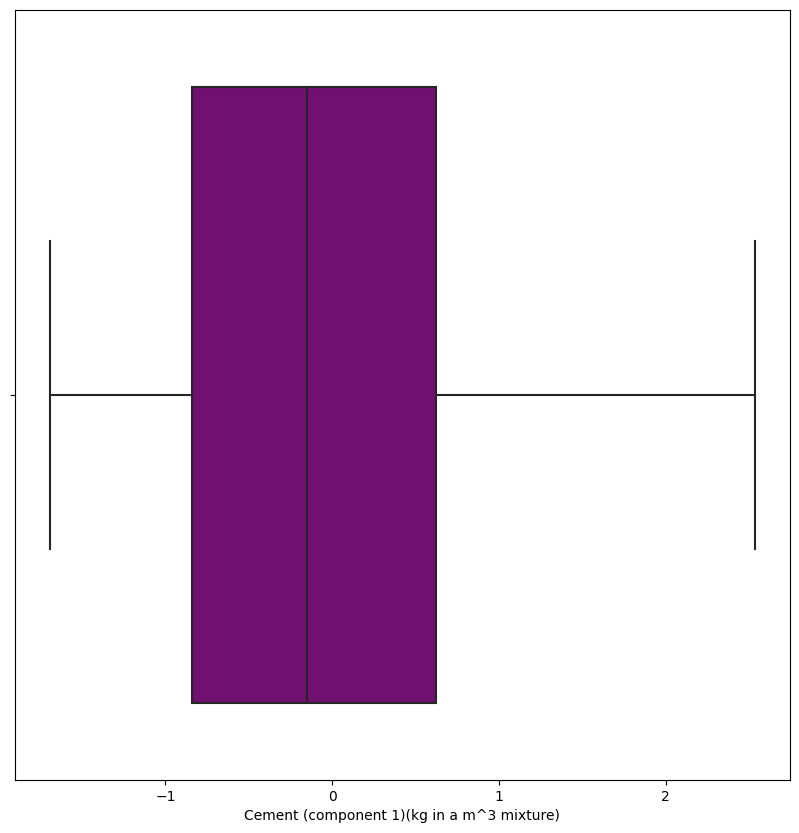

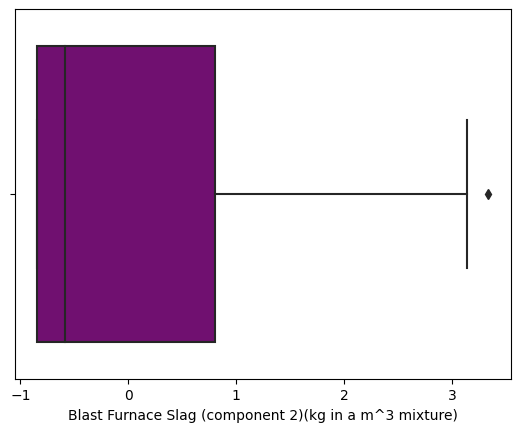

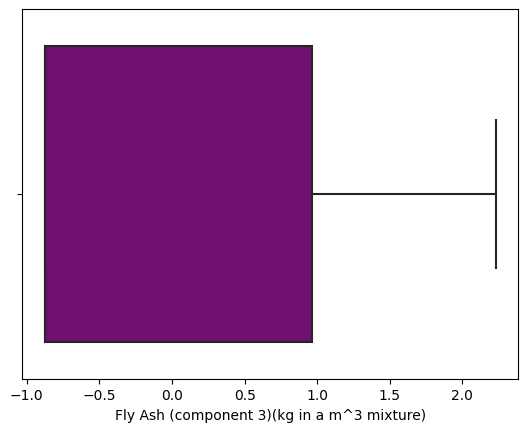

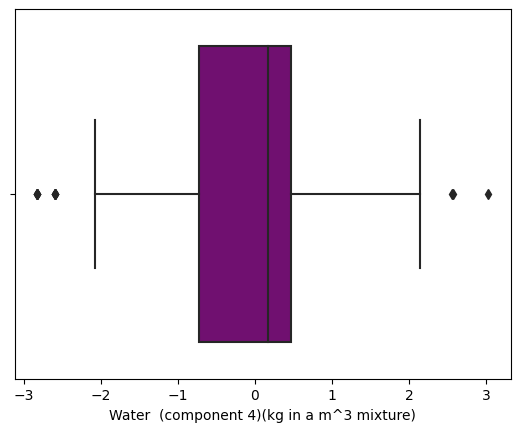

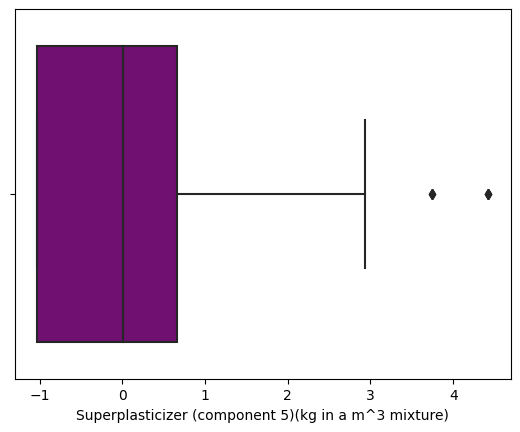

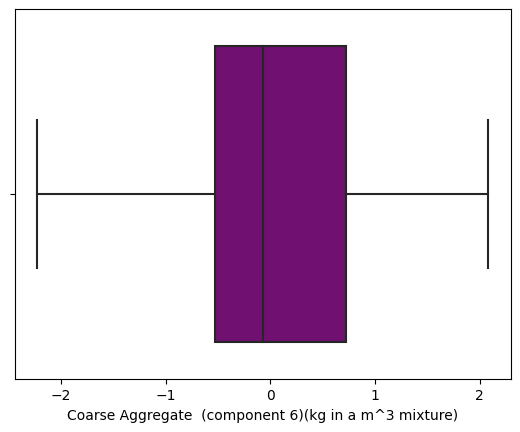

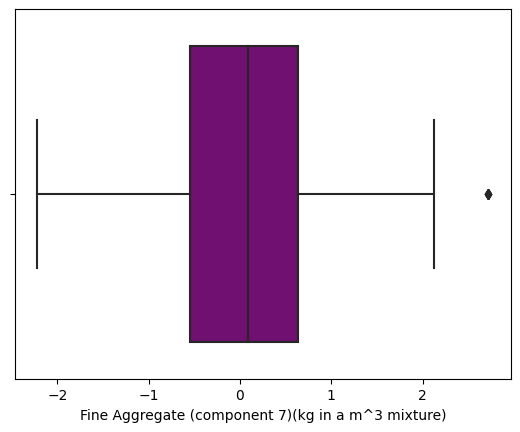

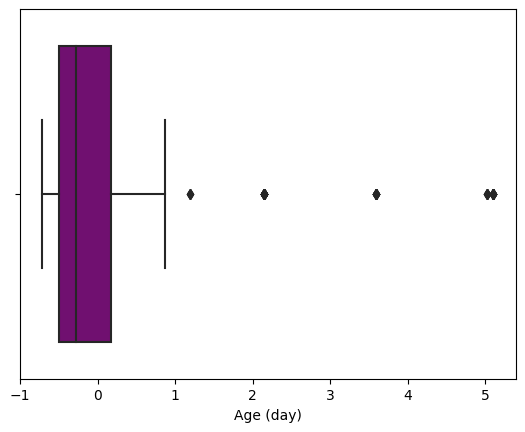

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# Graphical Visualization of features
for col in (X_train.columns):
    # print(col)
    sns.boxplot(x=X_train[col],color='purple')
    plt.xlabel(col)
    plt.show()
    print("\n") 